<a href="https://colab.research.google.com/github/grw23/PHYS332/blob/main/Exercise_4_Falling_Droplet_Worked_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling the maximum spread of a falling drop 

In this exercise we will test the simple models for spreading following drop impact using some real experimental data. 

These data were collected for drop impacts of a stage 1 bulk infant formula solution (20% total solids in water) on to stainless steel. 

The code below gives an examplar solution to the exercise.



Best fit coefficient =  0.2139
Best fit exponent =  0.411
R-squared =  0.938


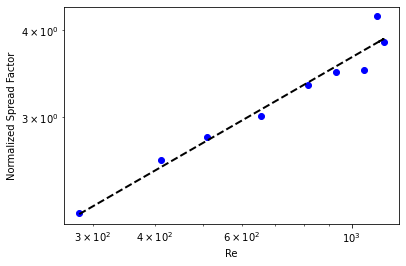

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# We will use this for curve fitting
from scipy.optimize import curve_fit

# A vector of 9 measurements of maximum spreading diameter, in mm.
Dmax = [4.38, 5.25, 5.75, 7.13, 7.97, 8.43, 8.56, 9.55, 9.43]

# A vector of corresponding measurements of drop diameter just prior to impact, in mm.
D0 = [2.01, 2.02, 2.05, 2.37, 2.39, 2.42, 2.44, 2.48, 2.25]

# A vector of corresponding measurements of impact velocity, in m/s.
v0 = [0.97, 1.41, 1.72, 1.92, 2.36, 2.66, 3.01, 3.24, 3.46]

# Viscosity of the liquid, in Pa s
eta = 0.0072

# Density of the liquid, in kg / m3
rho = 1040

# Surface tension of the liquid, in J / m2
gamma = 0.0534


# ------------- Calculation of some vectors
# e.g. see this link for matrix manipulation: https://www.tutorialspoint.com/matrix-manipulation-in-python

# A vector of normalised spread factors
beta = np.divide(Dmax,D0)

# Vectors of Reynolds and Weber numbers

Re = 1e-3*rho*np.multiply(D0,v0)/eta 
We = 1e-3*rho*np.multiply(D0,np.multiply(v0,v0))/gamma


# ------------- Making a plot with a fit
# e.g. for curve fitting see https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509
# And for plotting help try https://matplotlib.org/stable/index.html

# Define the number of points to be plotted.
npts = 101

# Define a function to calculate the power-law with constants a and b
def power_law(x, a, b): return a*np.power(x, b)

# Plot the experimental data as points using log-log axes
p = plt.loglog(Re, beta, 'bo')
# Label the axes
plt.ylabel('Normalized Spread Factor') 
plt.xlabel('Re')

# Fit the data to the power-law
pars, cov = curve_fit(f=power_law, xdata=Re, ydata=beta, p0=[0, 0], bounds=(-np.inf, np.inf))

# Inputs
# f — function used for fitting (in this case power law)
# xdata — array of x-data for fitting
# ydata — array of y-data for fitting
# p0 — array of initial guesses for the fitting parameters (both a and b as 0)
# bounds — bounds for the parameters (-∞ to ∞)
# Outputs
# pars — array of parameters from fit (in this case [a, b])
# cov — the estimated covariance of pars which can be used to determine the standard deviations of the fitting parameters (square roots of the diagonals)

# Calculate the residuals
res = beta - power_law(Re, *pars)

#Print out your calculated fit parameters, rounded to 3 sig figs
print ('Best fit coefficient = ', np.round(pars[0],4))
print ('Best fit exponent = ', np.round(pars[1],3))

#Calculate R-squared using the residuals, and print
betares = beta-np.mean(beta)
Rsq = 1 - np.sum(np.multiply(res,res))/np.sum(np.multiply(betares,betares))
print ('R-squared = ', np.round(Rsq,3))

# Plot the fit data as an overlay on the scatter data
plt.loglog(Re, power_law(Re, *pars), linestyle='--', linewidth=2, color='black')

plt.show() #Shows the graph, stops it from printing other things out


Repeat the fitting and plotting for Weber number

Best fit coefficient =  0.9612
Best fit exponent =  0.224
R-squared =  0.956


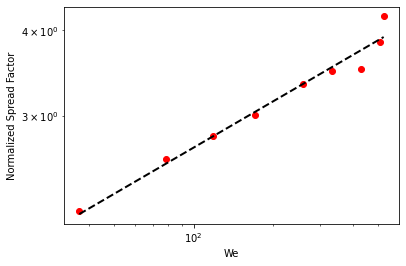

In [2]:
# ------------- Making a plot (Weber number))

# Define the number of points to be plotted.
npts = 101

# https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509
# Function to calculate the power-law with constants a and b
def power_law(x, a, b): return a*np.power(x, b)

# Plot the experimental data as points using log-log axes
p = plt.loglog(We, beta, 'ro')
# Label the axes
plt.ylabel('Normalized Spread Factor') 
plt.xlabel('We')

# Fit the data to the power-law
pars, cov = curve_fit(f=power_law, xdata=We, ydata=beta, p0=[0, 0], bounds=(-np.inf, np.inf))

# Inputs
# f — function used for fitting (in this case power law)
# xdata — array of x-data for fitting
# ydata — array of y-data for fitting
# p0 — array of initial guesses for the fitting parameters (both a and b as 0)
# bounds — bounds for the parameters (-∞ to ∞)
# Outputs
# pars — array of parameters from fit (in this case [a, b])
# cov — the estimated covariance of pars which can be used to determine the standard deviations of the fitting parameters (square roots of the diagonals)

# Calculate the residuals
res = beta - power_law(We, *pars)

#Print out your calculated fit parameters, rounded to 3 sig figs
print ('Best fit coefficient = ', np.round(pars[0],4))
print ('Best fit exponent = ', np.round(pars[1],3))

#Calculate R-squared using the residuals, and print
betares = beta-np.mean(beta)
Rsq = 1 - np.sum(np.multiply(res,res))/np.sum(np.multiply(betares,betares))
print ('R-squared = ', np.round(Rsq,3))

# Plot the fit data as an overlay on the scatter data
plt.loglog(We, power_law(We, *pars), linestyle='--', linewidth=2, color='black')

plt.show() #Shows the graph, stops it from printing other things out

Interpretation:
*   The power-law fit between $\beta$ and Re gives a much larger exponent (0.41) than the viscous model from lectures ($\beta\propto$Re$^{0.20}$).
*   The power-law fit between $\beta$ and We gives a better $R^2$ value than for We. The exponent (0.22) is much closer to the "effective gravity" model ($\beta\propto$We$^{0.25}$) than to the energy conservation model ($\beta\propto$We$^{0.50}$).


*Contact: Geoff Willmott (g.willmott@auckland@auckland.ac.nz)*